<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncodersFaceSketch/blob/main/Deep_Convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Convolutional autoencoder**

Data Preprocessing

In [ ]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 
import keras
from keras import layers
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

In [2]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [3]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Total number of sketch images: 1504
Total number of images: 1504
Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


Train Model for Face to Sketch

In [4]:


input_img = keras.Input(shape=(256, 256, 3))


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
#decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)


autoencoder = keras.Model(input_img, decoder_output)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
decoder_output.shape

TensorShape([None, 256, 256, 3])

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         1160  

Epoch 1/200
22/22 [==============================] - 15s 207ms/step - loss: 0.4796 - acc: 0.1426 - val_loss: 0.2029 - val_acc: 0.9825
Epoch 2/200
22/22 [==============================] - 3s 147ms/step - loss: 0.1828 - acc: 0.1806 - val_loss: 0.1506 - val_acc: 0.0476
Epoch 3/200
22/22 [==============================] - 3s 148ms/step - loss: 0.1536 - acc: 0.4601 - val_loss: 0.1317 - val_acc: 0.7717
Epoch 4/200
22/22 [==============================] - 3s 148ms/step - loss: 0.1376 - acc: 0.4317 - val_loss: 0.1198 - val_acc: 0.6058
Epoch 5/200
22/22 [==============================] - 3s 150ms/step - loss: 0.1244 - acc: 0.4230 - val_loss: 0.1153 - val_acc: 0.5435
Epoch 6/200
22/22 [==============================] - 3s 148ms/step - loss: 0.1157 - acc: 0.4232 - val_loss: 0.1097 - val_acc: 0.2994
Epoch 7/200
22/22 [==============================] - 3s 148ms/step - loss: 0.1083 - acc: 0.4240 - val_loss: 0.1030 - val_acc: 0.5086
Epoch 8/200
22/22 [==============================] - 3s 148ms/step -

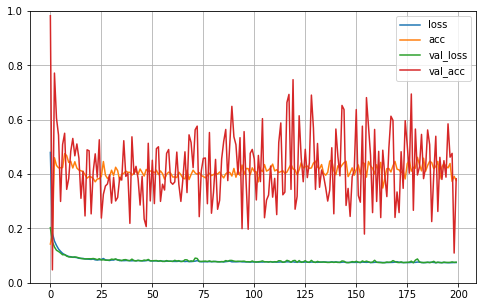

In [7]:
# Training for photo to sketch
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_image, train_sketch_image,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))



# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

**Evaluating image via Structural similarity index (SSIM)**

In [8]:
from skimage.metrics import structural_similarity as ssim
decoded_imgs = autoencoder.predict(test_sketch_image)
decoded_imgs = decoded_imgs[0].reshape(256, 256, 3)
print("SSIM value is ",ssim(train_sketch_image[0].reshape(256, 256, 3), decoded_imgs, multichannel = True))

SSIM value is  0.628573032714374


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


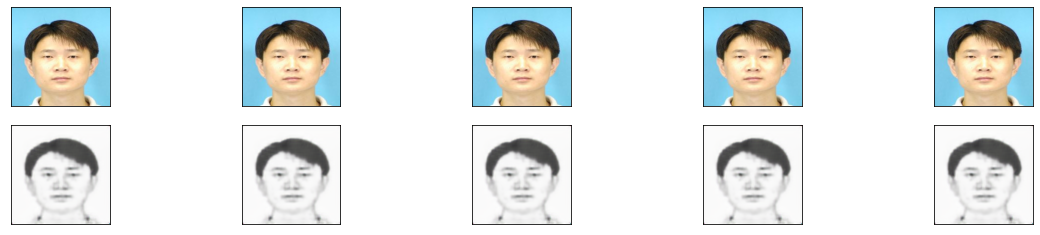

In [16]:
decoded_imgs = autoencoder.predict(test_image)

n = 5
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[0].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[0].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train Model for Sketch to Face

In [ ]:
# Training for Sketch to Photo
# Training
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_sketch_image,train_image,
                epochs=1500,
                batch_size=64,
                shuffle=True,
                validation_data=(test_sketch_image, test_image))



# plt.plot(hist.history["loss"]);
# plt.xlabel('Epochs');
# plt.ylabel('Training Error');
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Epoch 1/1500
22/22 [==============================] - 15s 207ms/step - loss: 0.3197 - acc: 0.3238 - val_loss: 0.2047 - val_acc: 0.4241
Epoch 2/1500
22/22 [==============================] - 3s 147ms/step - loss: 0.1989 - acc: 0.1582 - val_loss: 0.1813 - val_acc: 0.1208
Epoch 3/1500
22/22 [==============================] - 3s 149ms/step - loss: 0.1847 - acc: 0.1300 - val_loss: 0.1665 - val_acc: 0.1705
Epoch 4/1500
22/22 [==============================] - 3s 149ms/step - loss: 0.1701 - acc: 0.1689 - val_loss: 0.1506 - val_acc: 0.2092
Epoch 5/1500
22/22 [==============================] - 3s 149ms/step - loss: 0.1614 - acc: 0.2390 - val_loss: 0.1434 - val_acc: 0.2571
Epoch 6/1500
22/22 [==============================] - 3s 148ms/step - loss: 0.1557 - acc: 0.2897 - val_loss: 0.1391 - val_acc: 0.2927
Epoch 7/1500
22/22 [==============================] - 3s 149ms/step - loss: 0.1520 - acc: 0.3356 - val_loss: 0.1358 - val_acc: 0.3429
Epoch 8/1500
22/22 [==============================] - 3s 149m

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

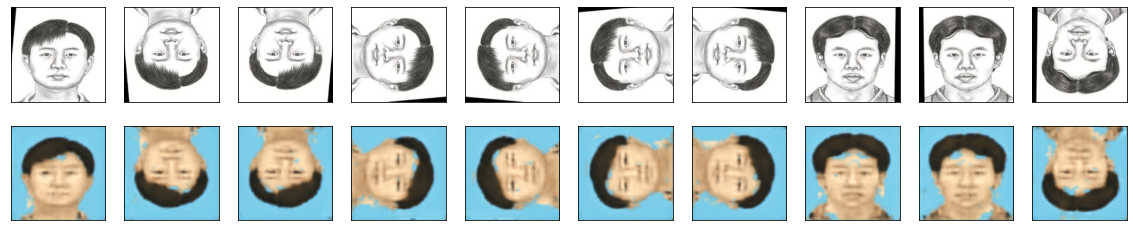

In [ ]:
decoded_imgs = autoencoder.predict(test_sketch_image)

n = 5
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Hyperparameter Tuning**

In [ ]:


def build_model(hp):
  input_img = keras.Input(shape=(256, 256, 3))
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  # for i in range(hp.Int('conv_blocks', 3, 5, default=3)):
    
  for i in range(2):
    # x = keras.layers.Conv2D(
    #   filters = hp.Int('filters_' + str(i), 16, 256, step=16), 
    #   kernel_size=hp.Choice('kernel' + str(i), values = [3,5]),
    #   activation='relu',
    #   padding='same')(x)
    x = keras.layers.Conv2D(
      filters = 16, 
      kernel_size=(3,3),
      activation='relu',
      padding='same')(x)

    if hp.Choice('pooling_' + str(i), ['avg', 'max']) == 'max':
      x = keras.layers.MaxPool2D(pool_size=(2, 2),padding='same')(x)
    else:
      x = keras.layers.AvgPool2D()(x)

  for _ in range(2):
    x = keras.layers.Conv2D(
      filters = 8, 
      kernel_size=(3,3),
      activation='relu',
      padding='same')(x)

    x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = layers.UpSampling2D((2, 2))(x)

  x = layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
  decoder_output = layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)
  autoencoder = keras.Model(input_img, decoder_output)
  autoencoder.compile(optimizer = tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')), loss = 'mean_absolute_error',
              metrics = ['acc'])
  return autoencoder


In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


     |████████████████████████████████| 98 kB 4.1 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          max_trials=5,directory='/content/output3',project_name="FaceToSketch")

In [ ]:
tuner_search.search(train_sketch_image,train_image,epochs=500,validation_split=0.1, validation_data=(test_sketch_image, test_image))

Trial 5 Complete [00h 23m 28s]
val_acc: 0.8997370004653931

Best val_acc So Far: 0.8997370004653931
Total elapsed time: 01h 57m 03s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        2320  

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         584 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

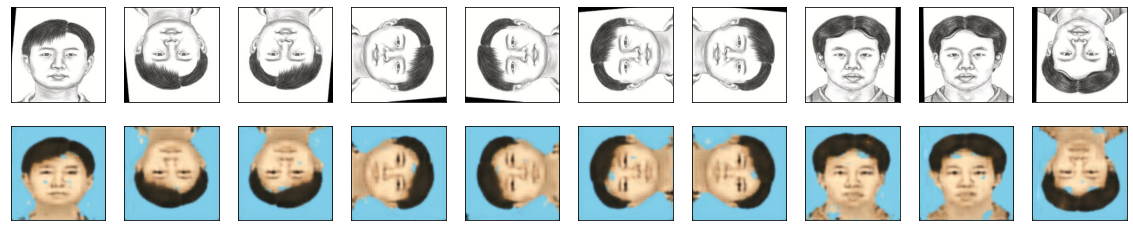

In [ ]:
decoded_imgs = model.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()